In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation

In [4]:
import config

CFG = config.Config()

In [ ]:
data = pd.concat([
	pd.read_parquet(f'{CFG.prediction_dir}/results/embeds.train.parquet'),
	pd.read_parquet(f'{CFG.prediction_dir}/results/embeds.test.parquet')
])
display(len(data))
data.head()

In [ ]:
embeds = PCA(n_components=2).fit_transform(np.stack(data.embeds.tolist()))

In [ ]:
data[['x', 'y']] = [(emb[0], emb[1]) for emb in embeds]
data.head()

In [ ]:
sns.scatterplot(data, x='x', y='y', hue='model')
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.pca.scatter.model.pdf', format='pdf')

In [ ]:
grid = sns.FacetGrid(
    data, col="model", hue="model", col_wrap=3,
    col_order=['human', 'llama2', 'llama3', 'mixtral', 'falcon', 'qwen']
    )
grid.map_dataframe(sns.kdeplot, x='x', y='y', fill=True)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.pca.kde.model.pdf', format='pdf')

In [ ]:
data['cluster'] = AffinityPropagation().fit_predict(data['embeds'].tolist())
data[['cluster', 'model']].value_counts().sort_index()

In [ ]:
sns.scatterplot(data, x='x', y='y', hue='cluster')
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.pca.scatter.cluster.pdf', format='pdf')

In [ ]:
grid = sns.FacetGrid(data, col="model", hue="cluster", col_wrap=2)
grid.map_dataframe(sns.kdeplot, x='x', y='y', fill=True)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.pca.kde.cluster.pdf', format='pdf')

In [17]:
(
    pd
    .read_csv(f'{CFG.prediction_dir}/results/metric.classification_report.csv', index_col=[0])
    [['precision', 'recall', 'f1-score']]
    .to_latex(f'{CFG.report_dir}/classification.results.tex', float_format=lambda f: f'{f:2.3f}')
)

<Axes: ylabel='gold'>

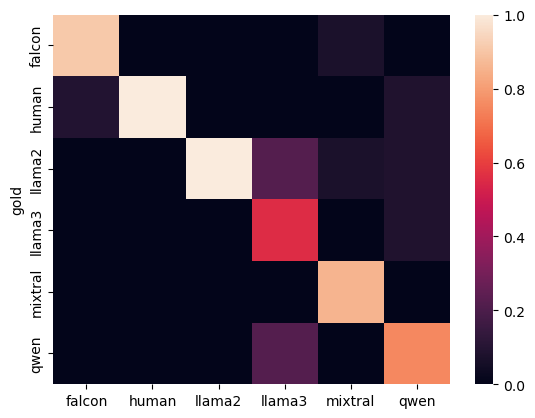

In [43]:
sns.heatmap(
    (df := pd.read_csv(f'{CFG.prediction_dir}/results/metric.cross_tabulation.csv', index_col=[0]))
    / df.sum(axis=0),
)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.heat.embed.classification.pdf', format='pdf')